# Nerflix Data Visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Admin/Downloads/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# clean the data

In [5]:
df=df.dropna(subset=['type','release_year','rating','country','duration'])

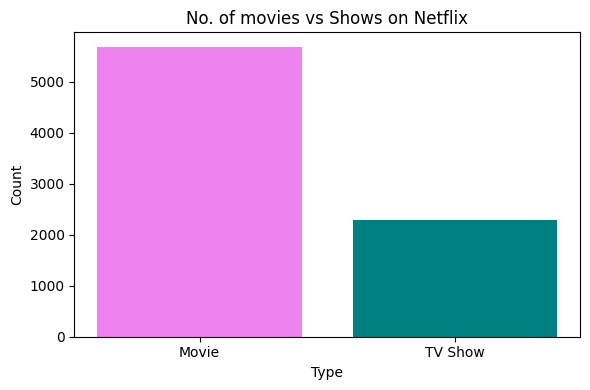

In [ ]:
type_counts=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['indigo','teal'])
plt.title('No. of movies vs Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('Movies_VS_tvshows.png')
plt.show()

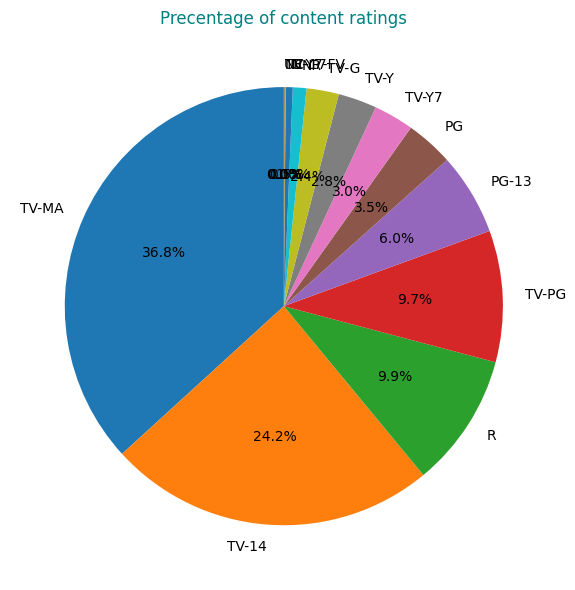

In [47]:
rating_counts=df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90)
plt.title('Precentage of content ratings',color='teal')
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()

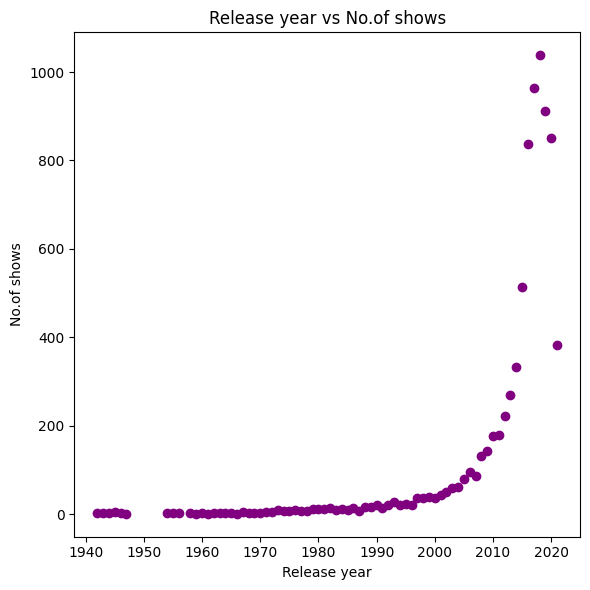

In [36]:
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.scatter(release_counts.index,release_counts.values,color='purple')
plt.title('Release year vs No.of shows')
plt.xlabel('Release year')
plt.ylabel('No.of shows')
plt.tight_layout()
plt.savefig('release_yr_scatter.png')
plt.show()

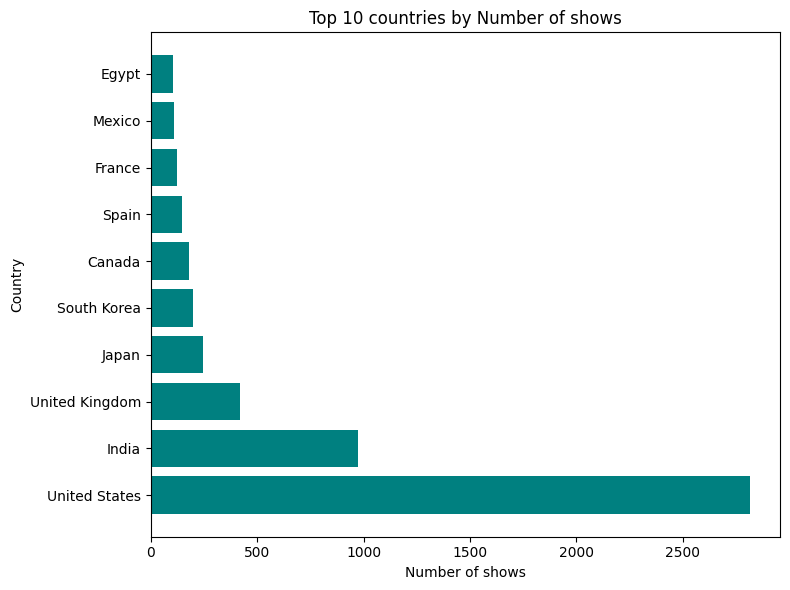

In [32]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values,color='teal')
plt.title('Top 10 countries by Number of shows')
plt.xlabel('Number of shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries_barchart.png')
plt.show()

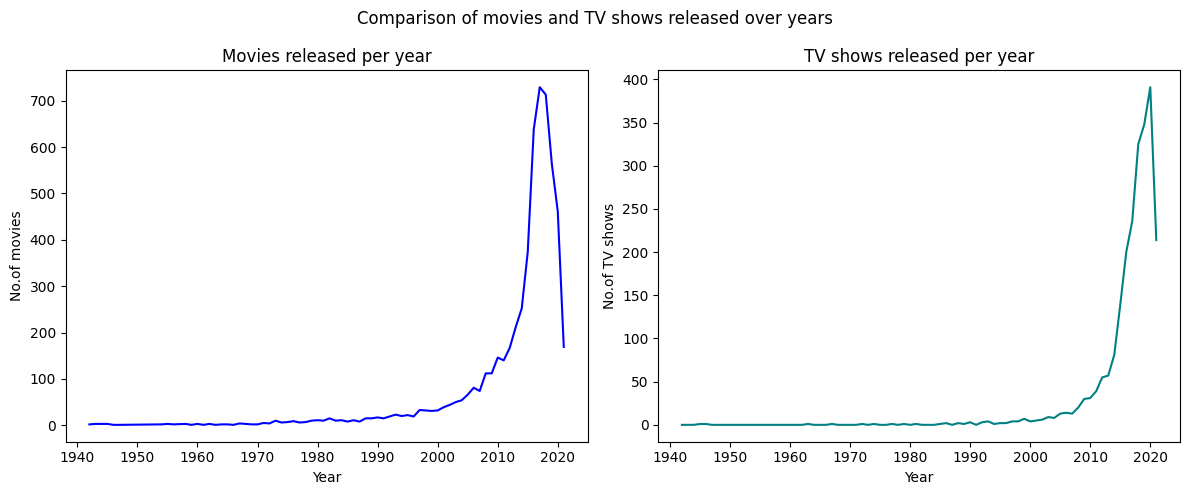

In [40]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))
# first subplot:movies
ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No.of movies')

# second subplot:TV shows
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='teal')
ax[1].set_title('TV shows released per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('No.of TV shows')
fig.suptitle('Comparison of movies and TV shows released over years')
plt.tight_layout()
plt.savefig('movies_tv_shows_comparisons.png')
plt.show()